In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Class for displaying basic DataFrame details ---
class Details:
    def data_details(self):
        print("DataFrame Details:")
        print(f"Number of rows: {self.df.shape[0]}")
        print(f"Number of columns: {self.df.shape[1]}")
        print("Column Data Types:")
        print(self.df.dtypes)

# --- Class for data manipulation, inherits from Details ---
class DataActions(Details):
    def __init__(self, df):
        self.df = df

    def create_df(self, fields: list):
        # Create a new DataFrame with selected fields and remove duplicates
        df = self.df[fields].copy()
        df = df.drop_duplicates(subset=fields[0]).reset_index(drop=True)
        return df

    def replace_value(self, value: str, dict_values: list):
        # Replace a string value with its index from a list
        if value in dict_values:
            index = dict_values.index(value)
            return index

    def replace_index(self, index: int, dict_values: list):
        # Replace an index with its corresponding value from a list
        if index < len(dict_values):
            return dict_values[index]

# --- Class for plotting various chart types ---
class Plotter:
    def __init__(self):
        pass

    def bar_chart(self, labels, values, color="skyblue",
                  title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        # Create a bar chart
        plt.figure(figsize=(6, 4))
        plt.bar(labels, values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def line_chart(self, x, y, color="green", marker="o",
                   title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        # Create a line chart
        plt.figure(figsize=(6, 4))
        plt.plot(x, y, color=color, marker=marker)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def frequency_chart(self, data, color="skyblue",
                        title="Frequency Chart", xlabel="Categories",
                        ylabel="Frequency", top_n=None):
        # Convert to pandas Series if not already
        if not isinstance(data, pd.Series):
            data = pd.Series(data)

        # Calculate frequencies
        freq = data.value_counts(dropna=False)

        # Show only top N values if specified
        if top_n:
            freq = freq.head(top_n)

        # Create frequency bar chart
        plt.figure(figsize=(6, 4))
        plt.bar(freq.index.astype(str), freq.values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    def scatter_plot(self, x, y, data=None, color="dodgerblue", size=50,
                     alpha=0.7, title="Scatter Plot", xlabel=None,
                     ylabel=None, trendline=False):
        # Handle input: extract values from DataFrame or use Series directly
        if isinstance(x, str) and data is not None:
            x_vals = data[x]
        else:
            x_vals = pd.Series(x)

        if isinstance(y, str) and data is not None:
            y_vals = data[y]
        else:
            y_vals = pd.Series(y)

        # Create scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x_vals, y_vals, c=color, s=size, alpha=alpha)
        plt.title(title)
        plt.xlabel(xlabel if xlabel else x)
        plt.ylabel(ylabel if ylabel else y)
        plt.grid(True, linestyle="--", alpha=0.6)

        # Add optional trendline
        if trendline:
            import numpy as np
            m, b = np.polyfit(x_vals, y_vals, 1)
            plt.plot(x_vals, m * x_vals + b, color="red", linewidth=2, label="Trendline")
            plt.legend()

        plt.tight_layout()
        plt.show()

## 1. Conecting with data

In [2]:
retail_2009_2010 = pd.read_excel(r"..\..\utils\cleaned_retail_2009.xlsx")
retail_2010_2011 = pd.read_excel(r"..\..\utils\cleaned_retail_2010.xlsx")

customers = pd.read_excel(r"..\..\utils\cleaned_customers.xlsx")
exchange = pd.read_excel(r"..\..\utils\Customer Data.xlsx", sheet_name="Conversion")
retail_2009_2011 = pd.concat([retail_2009_2010, retail_2010_2011], ignore_index=True)

print(retail_2009_2010.head(2))
print(retail_2010_2011.head(2))
print(customers.head(2))
print(exchange.head(4))
print(retail_2009_2011)

   invoice  stockcode                          description  quantity  \
0   489434      85048  15cm christmas glass ball 20 lights        12   
1   489434      79323                   Pink cherry lights        12   

  invoicedate  price  customer_id         country  
0  2009-12-01   6.95        13085  United kingdom  
1  2009-12-01   6.75        13085  United kingdom  
   invoice  stockcode                         description  quantity  \
0   536365      85123  White hanging heart t-light holder         6   
1   536365      71053                 White metal lantern         6   

  invoicedate  price  customer_id         country  
0  2010-12-01   2.55        17850  United kingdom  
1  2010-12-01   3.39        17850  United kingdom  
   customer_id first_name last_name                email gender department  \
0        17850      Roley     Fonzo  rfonzo0@blogger.com   Male    Jewelry   
1        13047      Alvie    Trymme   atrymme1@github.io   Male  Computers   

  currency  currency_i

## 2. DATA MODEL

The new data model is composed of the following tables:
- Customer
- Gender
- Department
- Currency
- Bill
- Conversion
- Country
- Currency_Conversion

### 2.1. Table definition 

In [3]:
# Create new DataActions objects for customers and retail data
cx = DataActions(customers)
retail = DataActions(retail_2009_2011)

# Create unique DataFrames for categorical fields
gender_df = cx.create_df(["gender"])
print(gender_df)

department_df = cx.create_df(["department"])
print(department_df)

currency_df = cx.create_df(["currency"])
print(currency_df)

country_df = retail.create_df(["country"])
print(country_df)

# Extract currency conversion data
conversion_df = exchange[["SourceCurrency", "TargetCurrency", "ConversionRate AVG"]]
print(conversion_df)

# Extract customer details
customer_df = cx.df[[
    "customer_id", "first_name", "last_name", "email",
    "gender", "department", "currency_id"
]]
print(customer_df)

# Extract billing details
bill_df = retail.df[[
    "invoice", "stockcode", "description", "quantity",
    "invoicedate", "price", "customer_id", "country"
]]

# Add a new column 'total' to bill_df
bill_df["total"] = bill_df["quantity"] * bill_df["price"]

# Create a dictionary to map customer_id to department
department_dict = customer_df.set_index("customer_id")["department"].to_dict()

# Map department info into bill_df
bill_df["department"] = bill_df["customer_id"].map(department_dict)

# Display the mapping dictionary and the final bill_df
print(department_dict)
print(bill_df)


        gender
0         Male
1       Female
2     Bigender
3      Agender
4  Genderqueer
5  Genderfluid
6   Polygender
7   Non-binary
     department
0       Jewelry
1     Computers
2      Outdoors
3          Home
4        Sports
5         Tools
6      Clothing
7    Automotive
8   Electronics
9         Shoes
10       Garden
11        Games
12       Movies
13         Kids
14        Books
15   Industrial
16         Toys
17         Baby
18       Beauty
19       Health
20        Music
21      Grocery
  currency
0      CAD
1      USD
2      EUR
                 country
0         United kingdom
1                 France
2              Australia
3                   Eire
4                Germany
5               Portugal
6                  Japan
7                 Poland
8                  Spain
9        Channel islands
10           Netherlands
11                 Italy
12                Cyprus
13               Belgium
14                Greece
15                Norway
16               Austria
17 

In [4]:
# Replace categorical values with their corresponding index from reference lists

# Replace gender values with index from gender list
gender_list = gender_df["gender"].tolist()
customer_df.loc[:, "gender"] = customer_df["gender"].apply(lambda x: cx.replace_value(x, gender_list))

# Replace department values with index from department list
department_list = department_df["department"].tolist()
customer_df.loc[:, "department"] = customer_df["department"].apply(lambda x: cx.replace_value(x, department_list))

# Replace currency_id index using base currency list
currency_list_base = ["A", "USD", "EUR", "CAD"]
customer_df.loc[:, "currency_id"] = customer_df["currency_id"].apply(lambda x: cx.replace_index(x, currency_list_base))

# Replace currency_id values with index from currency list
currency_list = currency_df["currency"].tolist()
customer_df.loc[:, "currency_id"] = customer_df["currency_id"].apply(lambda x: cx.replace_value(x, currency_list))

# Replace country values in bill_df with index from country list
country_list = country_df["country"].tolist()
bill_df.loc[:, "country"] = bill_df["country"].apply(lambda x: retail.replace_value(x, country_list))

# Replace department values in bill_df with index from department list
department_list = department_df["department"].tolist()
bill_df.loc[:, "department"] = bill_df["department"].apply(lambda x: retail.replace_value(x, department_list))

# Display transformed DataFrames
print(customer_df)
print(bill_df)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_11816\4247062279.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['CAD' 'USD' 'CAD' ... 'CAD' 'USD' 'USD']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  customer_df.loc[:, "currency_id"] = customer_df["currency_id"].apply(lambda x: cx.replace_index(x, currency_list_base))


      customer_id first_name last_name                             email  \
0           17850      Roley     Fonzo               rfonzo0@blogger.com   
1           13047      Alvie    Trymme                atrymme1@github.io   
2           12583     Benton      Pont                bpont2@skyrock.com   
3           13748       Joey  Landreth            jlandreth3@smugmug.com   
4           15100     Elissa    Minall                eminall4@globo.com   
...           ...        ...       ...                               ...   
5937        16355     Halsey   Baldoni              hbaldonife@goo.ne.jp   
5938        12351    Melodee  Spurrier          mspurrierff@usatoday.com   
5939        15828      Prudi     Pashe             ppashefg@netscape.com   
5940        17826      Moina  Duffield  mduffieldfh@networksolutions.com   
5941        17378    Kendell     Ayers                kayersfi@youku.com   

     gender department currency_id  
0         0          0           0  
1         0  

### 2.2. Table creation

In [5]:
# Create a dictionary to define currency-to-conversion mappings
crrn_conv = {
    "currency_id": [0, 0, 1, 1, 2, 2],
    "conversion_id": [3, 5, 0, 1, 2, 4]
}

# Convert the dictionary into a DataFrame
currency_conversion = pd.DataFrame(crrn_conv)

# Display the resulting DataFrame
print(currency_conversion)


   currency_id  conversion_id
0            0              3
1            0              5
2            1              0
3            1              1
4            2              2
5            2              4


## CHARTS

        index  invoice  stockcode                          description  \
0           0   489434      85048  15cm christmas glass ball 20 lights   
1           7   489435      22350                            Cat bowl    
2          11   489436      48173                Door mat black flock    
3          29   489437      22143    Christmas craft heart decorations   
4          50   489439      22065       Christmas pudding trinket pot    
...       ...      ...        ...                                  ...   
39213  689223   581580      23334             Ivory wicker heart small   
39214  689246   581582      23552         Bicycle puncture repair kit    
39215  689248   581585      22481       Black tea towel classic design   
39216  689269   581586      22061  Large cake stand  hanging strawbery   
39217  689272   581587      22631             Circus parade lunch box    

       quantity invoicedate  price  customer_id country  total department  
0            12  2009-12-01   6.95 

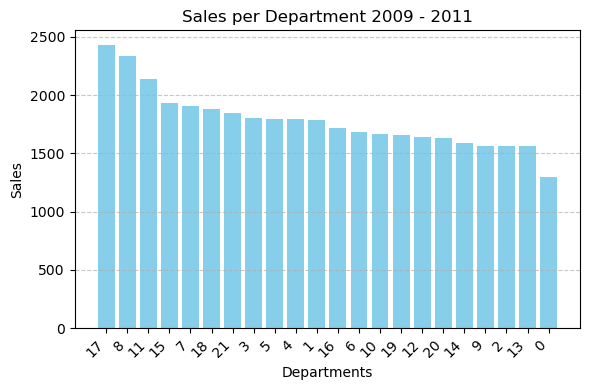

In [6]:
# Initialize the Plotter class
plotter = Plotter()

# Keep only the first occurrence of each invoice to represent a unique sale
retail_uniq_invoice = bill_df.drop_duplicates(subset="invoice", keep="first")

# Display the resulting DataFrame with reset index
print(retail_uniq_invoice.reset_index())

# Plot frequency chart of sales per department from 2009 to 2011
plotter.frequency_chart(
    retail_uniq_invoice["department"],
    title="Sales per Department 2009 - 2011",
    xlabel="Departments",
    ylabel="Sales"
)

     month       total
0  2009-12  374289.790
1  2010-01  258097.442


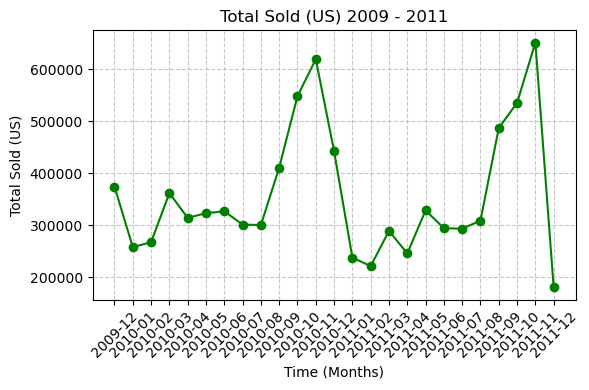

In [7]:
# Group sales by invoice to get unique transactions
retail_uniq_total = bill_df.groupby(by="invoice", as_index=False).agg({
    "invoicedate": "first",
    "total": "sum"
})

# Convert invoice date to datetime format
retail_uniq_total["invoicedate"] = pd.to_datetime(retail_uniq_total["invoicedate"])

# Extract month from invoice date
retail_uniq_total["month"] = retail_uniq_total["invoicedate"].dt.to_period("M")
retail_uniq_total["month"] = retail_uniq_total["month"].astype(str)

# Aggregate total sales by month
total_month = retail_uniq_total.groupby(by="month")["total"].sum().reset_index()

# Preview the first two rows
print(total_month.head(2))

# Plot monthly total sales from 2009 to 2011
plotter.line_chart(
    total_month["month"],
    total_month["total"],
    title="Total Sold (US) 2009 - 2011",
    xlabel="Time (Months)",
    ylabel="Total Sold (US)"
)

## 3. Storing tables

In [8]:
# --- Export DataFrames to Excel files ---
gender_df.to_excel(r"..\..\solution\Tables\gender.xlsx", index=True, index_label="gender_id")
department_df.to_excel(r"..\..\solution\Tables\department.xlsx", index=True, index_label="department_id")
currency_df.to_excel(r"..\..\solution\Tables\currency.xlsx", index=True, index_label="currency_id")
country_df.to_excel(r"..\..\solution\Tables\country.xlsx", index=True, index_label="country_id")
conversion_df.to_excel(r"..\..\solution\Tables\conversion.xlsx", index=True, index_label="conversion_id")
currency_conversion.to_excel(r"..\..\solution\Tables\currency_conversion.xlsx", index=True, index_label="c_c_id")
customer_df.to_excel(r"..\..\solution\Tables\customer.xlsx", index=False)
bill_df.to_excel(r"..\..\solution\Tables\bill.xlsx", index=True, index_label="invoice_id")

"""
# --- Optional: Export DataFrames to CSV files ---
gender_df.to_csv(r"..\..\solution\Tables\gender.csv", index=True, index_label="gender_id")
department_df.to_csv(r"..\..\solution\Tables\department.csv", index=True, index_label="department_id")
currency_df.to_csv(r"..\..\solution\Tables\currency.csv", index=True, index_label="currency_id")
country_df.to_csv(r"..\..\solution\Tables\country.csv", index=True, index_label="country_id")
conversion_df.to_csv(r"..\..\solution\Tables\conversion.csv", index=True, index_label="conversion_id")
currency_conversion.to_csv(r"..\..\solution\Tables\currency_conversion.csv", index=True, index_label="c_c_id")
customer_df.to_csv(r"..\..\solution\Tables\customer.csv", index=False)
bill_df.to_csv(r"..\..\solution\Tables\bill.csv", index=True, index_label="invoice_id")
"""


'\n# --- Optional: Export DataFrames to CSV files ---\ngender_df.to_csv(r"..\\..\\solution\\Tables\\gender.csv", index=True, index_label="gender_id")\ndepartment_df.to_csv(r"..\\..\\solution\\Tables\\department.csv", index=True, index_label="department_id")\ncurrency_df.to_csv(r"..\\..\\solution\\Tables\\currency.csv", index=True, index_label="currency_id")\ncountry_df.to_csv(r"..\\..\\solution\\Tables\\country.csv", index=True, index_label="country_id")\nconversion_df.to_csv(r"..\\..\\solution\\Tables\\conversion.csv", index=True, index_label="conversion_id")\ncurrency_conversion.to_csv(r"..\\..\\solution\\Tables\\currency_conversion.csv", index=True, index_label="c_c_id")\ncustomer_df.to_csv(r"..\\..\\solution\\Tables\\customer.csv", index=False)\nbill_df.to_csv(r"..\\..\\solution\\Tables\x08ill.csv", index=True, index_label="invoice_id")\n'